In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_audi = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\audi.csv')

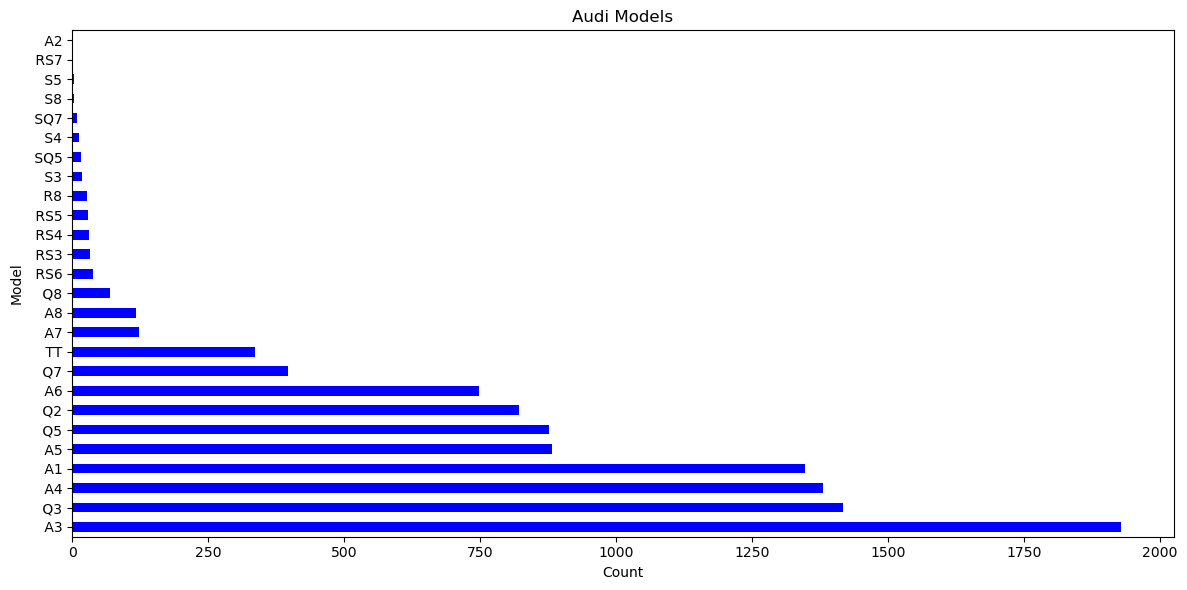

In [5]:
df_audi = df_audi.sort_values(by='model', ascending=False)
ax = df_audi["model"].value_counts().plot.barh(color='blue', figsize=(12, 6))

ax.set_xlabel("Count")  
ax.set_ylabel("Model")
ax.set_title("Audi Models")

plt.tight_layout()
plt.show()

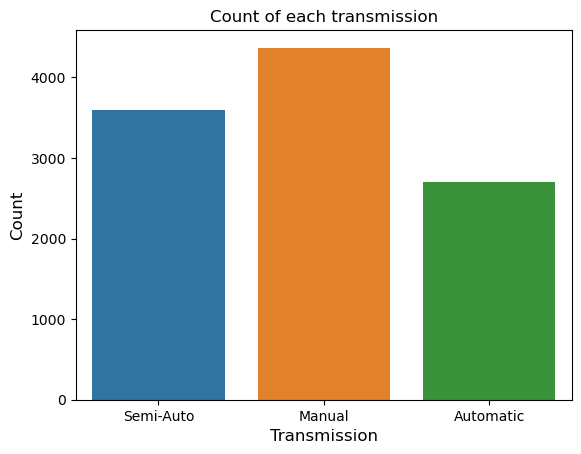

In [6]:
sns.countplot(x="transmission", data=df_audi)

plt.title('Count of each transmission')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Transmission', fontsize=12) 

plt.show()

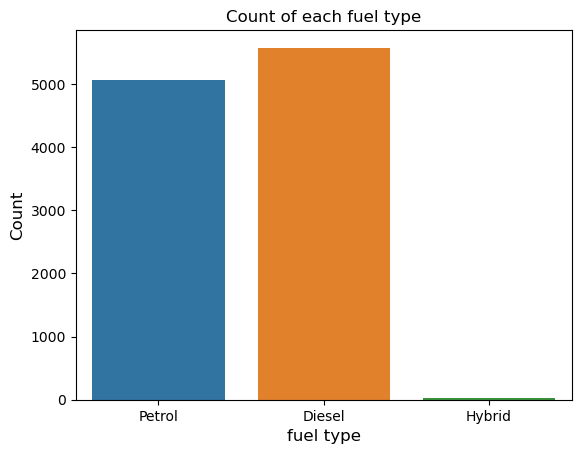

In [7]:
sns.countplot(x="fuelType", data=df_audi)

plt.title('Count of each fuel type')
plt.ylabel('Count', fontsize=12)
plt.xlabel('fuel type', fontsize=12) 

plt.show()

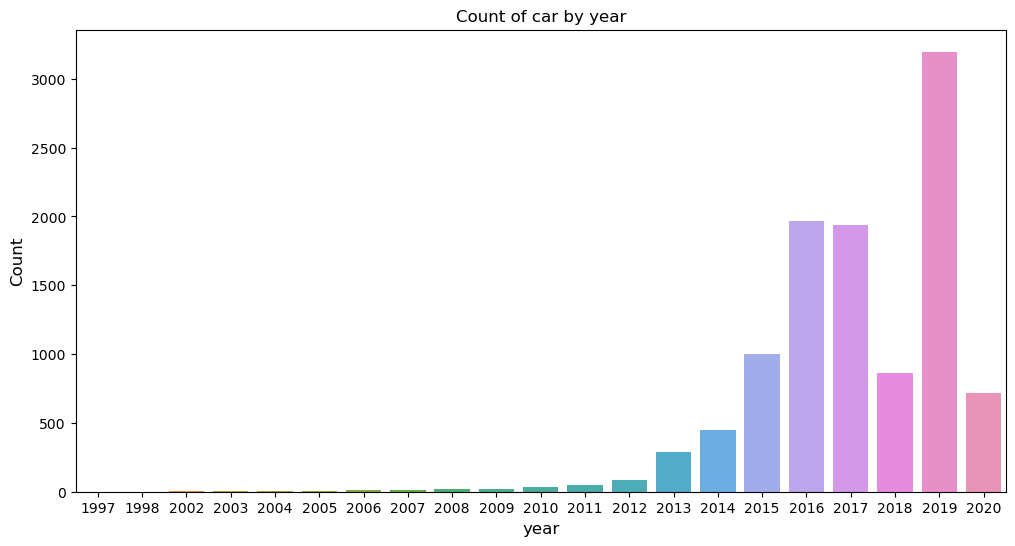

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))  

sns.countplot(x="year", data=df_audi, ax=ax)

plt.title('Count of car by year')
plt.ylabel('Count', fontsize=12)
plt.xlabel('year', fontsize=12) 

plt.show()

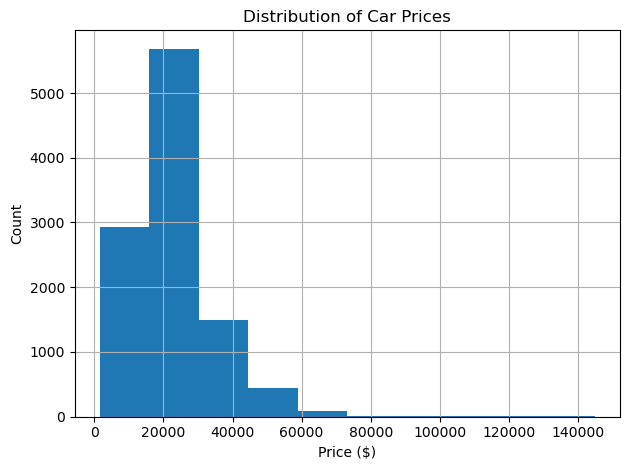

In [9]:
plt.hist(df_audi['price'], bins=10)
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\audi.csv')
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
Y = df.iloc[:,[2]].values


In [12]:
print(X)


[[' A1' 2017 'Manual' ... 150 55.4 1.4]
 [' A6' 2016 'Automatic' ... 20 64.2 2.0]
 [' A1' 2016 'Manual' ... 30 55.4 1.4]
 ...
 [' A3' 2020 'Manual' ... 150 49.6 1.0]
 [' Q3' 2017 'Automatic' ... 150 47.9 1.4]
 [' Q3' 2016 'Manual' ... 150 47.9 1.4]]


In [13]:
print(Y)

[[12500]
 [16500]
 [11000]
 ...
 [17199]
 [19499]
 [15999]]


In [ ]:
# Data Preprocessing
#Label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)

In [16]:
print(X)

[[0.0 1.0 0.0 ... 150 55.4 1.4]
 [1.0 0.0 0.0 ... 20 64.2 2.0]
 [0.0 1.0 0.0 ... 30 55.4 1.4]
 ...
 [0.0 1.0 0.0 ... 150 49.6 1.0]
 [1.0 0.0 0.0 ... 150 47.9 1.4]
 [0.0 1.0 0.0 ... 150 47.9 1.4]]


In [ ]:
#Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
print(X)

[[-0.58326752  1.2007284  -0.71233307 ...  0.35714729  0.35755001
  -0.88021837]
 [ 1.71447913 -0.83282781 -0.71233307 ... -1.57832278  1.03713001
   0.11492465]
 [-0.58326752  1.2007284  -0.71233307 ... -1.42944047  0.35755001
  -0.88021837]
 ...
 [-0.58326752  1.2007284  -0.71233307 ...  0.35714729 -0.09035499
  -1.54364705]
 [ 1.71447913 -0.83282781 -0.71233307 ...  0.35714729 -0.22163749
  -0.88021837]
 [-0.58326752  1.2007284  -0.71233307 ...  0.35714729 -0.22163749
  -0.88021837]]


In [ ]:
#Spliting dataset into training set and test set

In [19]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#Training model

In [22]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)

C:\Users\Lenovo\New folder\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [23]:
y_pred = regression.predict(X_test)

In [24]:
#Testing result


In [24]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))


[[14337.15 14998.  ]
 [23450.35 21950.  ]
 [27330.07 28990.  ]
 ...
 [46275.18 45995.  ]
 [31359.   30500.  ]
 [ 9929.62  8400.  ]]


In [ ]:
#calculating accuracy

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(Y_test, y_pred)

0.9536134841307546

In [26]:
mean_absolute_error(Y_test,y_pred)

1538.730980670462

In [27]:
print(y_pred)

[14337.15 23450.35 27330.07 ... 46275.18 31359.    9929.62]


In [28]:
print(Y_test)

[[14998]
 [21950]
 [28990]
 ...
 [45995]
 [30500]
 [ 8400]]


In [29]:
y_pred = np.reshape(y_pred,(-1,1))

In [ ]:
# Making pandas dataframe

In [30]:
mydata = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(mydata,columns=['Real Price','Predicted Price'])

In [31]:

print(dataframe)
     

      Real Price  Predicted Price
0        14998.0         14337.15
1        21950.0         23450.35
2        28990.0         27330.07
3        25489.0         27200.98
4        30950.0         32250.05
...          ...              ...
2129     23700.0         39147.77
2130     18000.0         16679.95
2131     45995.0         46275.18
2132     30500.0         31359.00
2133      8400.0          9929.62

[2134 rows x 2 columns]
